<a href="https://colab.research.google.com/github/harsh-jaiswal13/MACHINE_Learning/blob/main/Profiling_of_ML_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_excel('/content/TTHE1 (1).xlsx')

In [ ]:
df.head()

,Day,Incident_code,Location_start,Location_end,Type_of_incident,terrorists_attack_force,Number_of_nationalities,First_nationality_of_terrorists,Second_nationality_of_terrorists,Third_nationality_of_terrorists,...,Threats_Carried_Out,Terrorist_Negotiation_Success,Target_Negotiator,Amount_of_Ransom_Paid,Number_of_Prisoners_Released,First_hostage_fate,Second_hostage_fate,Duration_in_Hours,Duration_in_Days,Year
0,19,4,999,999,9,99,1,850,998,998,...,9.0,9.0,9.0,0.0,0.0,99.0,98.0,99.0,999.0,1
1,3,1,92,92,2,24,1,92,999,999,...,9.0,9.0,9.0,0.0,999.0,2.0,98.0,99.0,999.0,1
2,17,2,100,100,1,99,9,999,999,999,...,0.0,3.0,5.0,0.0,0.0,14.0,98.0,96.0,5.0,1
3,21,1,92,92,1,2,9,92,999,999,...,9.0,8.0,8.0,0.0,0.0,10.0,98.0,1.0,0.0,1
4,8,1,211,211,1,99,9,999,999,999,...,9.0,8.0,8.0,0.0,0.0,98.0,98.0,99.0,999.0,1


In [ ]:
df['Year'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# cf.countna()
df.isna().sum().sum()

54

In [ ]:
df=df.dropna()

In [ ]:
from sklearn.svm import SVC


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Year'], df["Year"], test_size=0.33, random_state=52)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

In [ ]:
clf=SVC()

SVC()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
lis=precision_recall_fscore_support(y_test, y_pred, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
t=2
lis[2]
print(t<lis[2])

False


In [ ]:
def tuner():
  temp=float('-inf')
  itr=0
  for i in range(0,40):
    X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Year'], df["Year"], test_size=0.33, random_state=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    y_pred=clf.predict(X_test)
    lis=precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    print(f"f1_score {lis[2]}/n")
    if(temp<(lis[2])):
      temp=lis[2]
      itr=i
  return itr

In [ ]:
print(itr)

35


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Year'], df["Year"], test_size=0.33, random_state=itr)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred=clf.predict(X_test)
lis=precision_recall_fscore_support(y_test, y_pred, average='macro')
  
print(f"f1_score {lis[2]}/n")
 

f1_score 0.2040581027538768/n


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.34316770186335405

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

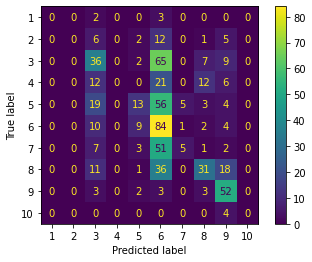

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [ ]:
def fun():
  import pandas as pd
  df=pd.read_excel('/content/TTHE1 (1).xlsx')
  df=df.dropna()
  from sklearn.svm import SVC
  from sklearn.model_selection import train_test_split

  # scaler = StandardScaler()
  # scaler.fit(X_train)
  # scaler.transform(X_train)

  clf=SVC()

  X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Year'], df["Year"], test_size=0.33, random_state=35)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  y_pred=clf.predict(X_test)

# print(lis)

In [ ]:
%timeit fun()

1.66 s ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%prun fun()
# SIR in this output will printed in side window and looks like below

```
4104061 function calls (4103578 primitive calls) in 2.887 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      193    0.328    0.002    1.158    0.006 {method 'Parse' of 'pyexpat.xmlparser' objects}
   191552    0.271    0.000    0.272    0.000 {method 'start' of 'xml.etree.ElementTree.TreeBuilder' objects}
   191552    0.245    0.000    0.592    0.000 ElementTree.py:1544(_start)
        1    0.208    0.208    0.208    0.208 {sklearn.svm._libsvm.fit}
        2    0.206    0.103    0.206    0.103 {sklearn.svm._libsvm.predict}
    94320    0.203    0.000    0.461    0.000 _reader.py:177(parse_cell)
    94320    0.120    0.000    0.130    0.000 cell.py:193(coordinate_to_tuple)
   101088    0.105    0.000    0.216    0.000 _openpyxl.py:549(_convert_cell)
   579462    0.100    0.000    0.100    0.000 ElementTree.py:1533(_fixname)
   190898    0.097    0.000    0.133    0.000 ElementTree.py:1287(read_events)
     2107    0.087    0.000    1.978    0.001 _reader.py:113(parse)
   191549    0.086    0.000    0.138    0.000 ElementTree.py:1556(_end)
   191549    0.083    0.000    0.238    0.000 ElementTree.py:1512(handler)
     2106    0.069    0.000    0.136    0.000 _read_only.py:101(_get_row)
102212/102167    0.065    0.000    0.068    0.000 {built-in method builtins.hasattr}
   282960    0.055    0.000    0.055    0.000 {method 'get' of 'xml.etree.ElementTree.Element' objects}
    94320    0.051    0.000    0.067    0.000 read_only.py:14(__init__)
    94074    0.041    0.000    0.041    0.000 _reader.py:78(_cast_number)
190705/190704    0.037    0.000    1.372    0.000 ElementTree.py:1219(iterator)
    94320    0.033    0.000    0.033    0.000 {method 'findtext' of 'xml.etree.ElementTree.Element' objects}
     2106    0.030    0.000    0.246    0.000 _openpyxl.py:573(<listcomp>)
     2106    0.030    0.000    0.492    0.000 _reader.py:286(<listcomp>)
   101356    0.027    0.000    0.091    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
197746/197744    0.022    0.000    0.023    0.000 {built-in method builtins.isinstance}
   188442    0.021    0.000    0.021    0.000 read_only.py:108(value)
       48    0.019    0.000    0.019    0.000 {pandas._libs.lib.maybe_convert_numeric}
   191549    0.019    0.000    0.019    0.000 {method 'end' of 'xml.etree.ElementTree.TreeBuilder' objects}
      198    0.018    0.000    0.018    0.000 {method 'decompress' of 'zlib.Decompress' objects}
   191549    0.017    0.000    0.017    0.000 {method 'append' of 'collections.deque' objects}
    94320    0.016    0.000    0.016    0.000 read_only.py:112(value)
     2204    0.015    0.000    0.015    0.000 {method 'clear' of 'xml.etree.ElementTree.Element' objects}
   190702    0.015    0.000    0.015    0.000 {method 'popleft' of 'collections.deque' objects}
        1    0.012    0.012    2.382    2.382 _openpyxl.py:565(get_sheet_data)
     2106    0.012    0.000    0.509    0.000 _reader.py:265(parse_row)
    94327    0.010    0.000    0.010    0.000 {method 'upper' of 'str' objects}
105161/104979    0.010    0.000    0.010    0.000 {built-in method builtins.len}
      130    0.007    0.000    0.007    0.000 {method 'read' of '_io.BufferedReader' objects}
     2107    0.006    0.000    2.121    0.001 _read_only.py:58(_cells_by_row)
        1    0.005    0.005    0.033    0.033 _base.py:1166(__init__)
      198    0.005    0.000    0.039    0.000 zipfile.py:987(_read1)
      208    0.005    0.000    0.005    0.000 {built-in method zlib.crc32}
     2106    0.003    0.000    0.005    0.000 _reader.py:281(<setcomp>)
      200    0.003    0.000    0.043    0.000 zipfile.py:907(read)
        1    0.003    0.003    0.003    0.003 {pandas._libs.lib.to_object_array}
      134    0.002    0.000    0.002    0.000 {method 'seek' of '_io.BufferedReader' objects}
     6737    0.002    0.000    0.002    0.000 {method 'startswith' of 'str' objects}
      123    0.002    0.000    0.010    0.000 zipfile.py:747(read)
   114/61    0.001    0.000    0.006    0.000 serialisable.py:46(from_tree)
      112    0.001    0.000    0.001    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        2    0.001    0.001    0.001    0.001 {built-in method io.open}
    69/61    0.001    0.000    0.003    0.000 {built-in method numpy.asarray}
      191    0.001    0.000    1.159    0.006 ElementTree.py:1627(feed)
        3    0.001    0.000    0.001    0.000 {pandas._libs.algos.take_2d_axis1_int64_int64}
      302    0.001    0.000    0.002    0.000 {built-in method builtins.max}
      108    0.001    0.000    0.011    0.000 zipfile.py:1023(_read2)
        3    0.001    0.000    0.001    0.000 managers.py:1478(_interleave)
        1    0.001    0.001    0.002    0.002 excel.py:133(read_manifest)
      121    0.001    0.000    0.001    0.000 nested.py:28(__set__)
     3152    0.001    0.000    0.001    0.000 {method 'append' of 'list' objects}
        3    0.001    0.000    0.001    0.000 managers.py:1950(_stack_arrays)
      713    0.001    0.000    0.001    0.000 base.py:38(__set__)
      191    0.001    0.000    1.159    0.006 ElementTree.py:1263(feed)
        1    0.001    0.001    2.887    2.887 <string>:1(<module>)
        3    0.001    0.000    0.001    0.000 managers.py:1981(_merge_blocks)
2790/2787    0.001    0.000    0.001    0.000 {built-in method builtins.getattr}
     6913    0.001    0.000    0.001    0.000 {method 'pop' of 'list' objects}
      198    0.001    0.000    0.005    0.000 zipfile.py:940(_update_crc)
        3    0.001    0.000    0.012    0.004 validation.py:494(check_array)
    40/39    0.001    0.000    0.006    0.000 series.py:315(__init__)
    40/35    0.001    0.000    0.002    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        3    0.001    0.000    0.001    0.000 {pandas._libs.algos.take_2d_axis1_float64_float64}
        2    0.001    0.000    0.001    0.000 zipfile.py:1807(__del__)
   129/56    0.001    0.000    0.001    0.000 serialisable.py:204(__hash__)
        1    0.001    0.001    0.031    0.031 readers.py:1045(read)
      940    0.000    0.000    0.000    0.000 base.py:23(__set__)
      438    0.000    0.000    0.001    0.000 base.py:64(__set__)
       52    0.000    0.000    0.001    0.000 missing.py:221(_isna_array)
      149    0.000    0.000    0.001    0.000 _dtype.py:321(_name_get)
       80    0.000    0.000    0.001    0.000 construction.py:463(sanitize_array)
        2    0.000    0.000    0.003    0.001 zipfile.py:1317(_RealGetContents)
      135    0.000    0.000    0.000    0.000 {method 'tell' of '_io.BufferedReader' objects}
        1    0.000    0.000    2.887    2.887 <ipython-input-9-20729b7a214c>:1(fun)
       32    0.000    0.000    0.000    0.000 {built-in method numpy.array}
     1963    0.000    0.000    0.000    0.000 _openpyxl.py:586(<genexpr>)
      236    0.000    0.000    0.001    0.000 common.py:190(is_sparse)
     1963    0.000    0.000    0.000    0.000 _openpyxl.py:587(<genexpr>)
      890    0.000    0.000    0.000    0.000 generic.py:43(_check)
     1962    0.000    0.000    0.000    0.000 python_parser.py:928(<genexpr>)
       47    0.000    0.000    0.002    0.000 blocks.py:1931(new_block)
        1    0.000    0.000    0.021    0.021 base_parser.py:520(_convert_to_ndarrays)
      101    0.000    0.000    0.001    0.000 {built-in method builtins.min}
        2    0.000    0.000    0.000    0.000 validation.py:1043(check_random_state)
       48    0.000    0.000    0.021    0.000 base_parser.py:674(_infer_types)
        5    0.000    0.000    0.001    0.000 __init__.py:336(__init__)
        1    0.000    0.000    0.001    0.001 worksheet.py:100(_setup)
       35    0.000    0.000    0.000    0.000 {method 'take' of 'numpy.ndarray' objects}
      142    0.000    0.000    0.001    0.000 sequence.py:23(__set__)
      8/2    0.000    0.000    0.000    0.000 serialisable.py:106(to_tree)
        3    0.000    0.000    0.001    0.000 fonts.py:101(from_tree)
        3    0.000    0.000    0.001    0.000 {pandas._libs.lib.map_infer}
        3    0.000    0.000    0.000    0.000 {pandas._libs.lib.maybe_convert_objects}
       95    0.000    0.000    0.001    0.000 blocks.py:1890(get_block_type)
       47    0.000    0.000    0.000    0.000 generic.py:233(__init__)
        1    0.000    0.000    0.004    0.004 strings.py:9(read_string_table)
        1    0.000    0.000    0.004    0.004 workbook.py:58(__init__)
       10    0.000    0.000    0.001    0.000 zipfile.py:1467(open)
     1047    0.000    0.000    0.000    0.000 {built-in method builtins.issubclass}
        1    0.000    0.000    0.002    0.002 workbook.py:90(_setup_styles)
        2    0.000    0.000    0.001    0.001 _optional.py:64(import_optional_dependency)
        6    0.000    0.000    0.000    0.000 managers.py:224(_rebuild_blknos_and_blklocs)
        1    0.000    0.000    0.000    0.000 _methods.py:195(_var)
      119    0.000    0.000    0.000    0.000 functions.py:75(localname)
       84    0.000    0.000    0.000    0.000 common.py:1744(pandas_dtype)
        3    0.000    0.000    0.000    0.000 ElementTree.py:1448(__init__)
    64/58    0.000    0.000    0.001    0.000 generic.py:5473(__getattr__)
      147    0.000    0.000    0.000    0.000 numerictypes.py:358(issubdtype)
       28    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0xa99860}
       34    0.000    0.000    0.000    0.000 {method 'decode' of 'bytes' objects}
       10    0.000    0.000    0.000    0.000 zipfile.py:799(__init__)
        2    0.000    0.000    0.002    0.001 common.py:522(get_handle)
       57    0.000    0.000    0.001    0.000 generic.py:5489(__setattr__)
       18    0.000    0.000    0.000    0.000 generic.py:5435(__finalize__)
        1    0.000    0.000    0.003    0.003 _base.py:1039(inspect_excel_format)
      198    0.000    0.000    0.001    0.000 base.py:160(__set__)
       47    0.000    0.000    0.000    0.000 {built-in method numpy.empty}
       80    0.000    0.000    0.000    0.000 construction.py:673(_try_cast)
        2    0.000    0.000    0.001    0.000 common.py:227(_get_filepath_or_buffer)
        1    0.000    0.000    0.001    0.001 workbook.py:46(parse)
      149    0.000    0.000    0.000    0.000 common.py:1578(_is_dtype_type)
        5    0.000    0.000    0.000    0.000 arraysetops.py:320(_unique1d)
       82    0.000    0.000    0.000    0.000 base.py:425(find)
      6/3    0.000    0.000    0.001    0.000 base.py:375(__new__)
      123    0.000    0.000    0.000    0.000 zipfile.py:1516(<lambda>)
      294    0.000    0.000    0.000    0.000 numerictypes.py:284(issubclass_)
    96/95    0.000    0.000    0.001    0.000 {built-in method builtins.all}
      124    0.000    0.000    0.000    0.000 {method 'match' of 're.Pattern' objects}
        1    0.000    0.000    0.002    0.002 stylesheet.py:188(apply_stylesheet)
        1    0.000    0.000    0.000    0.000 class_weight.py:8(compute_class_weight)
       56    0.000    0.000    0.000    0.000 blocks.py:1858(maybe_coerce_values)
        4    0.000    0.000    0.001    0.000 validation.py:90(_assert_all_finite)
    54/52    0.000    0.000    0.002    0.000 missing.py:144(_isna)
       36    0.000    0.000    0.000    0.000 config.py:96(_get_single_key)
        4    0.000    0.000    0.000    0.000 indexers.py:249(maybe_convert_indices)
        1    0.000    0.000    0.000    0.000 {pandas._libs.algos.take_2d_axis0_int64_int64}
        1    0.000    0.000    2.414    2.414 _base.py:476(parse)
      100    0.000    0.000    0.000    0.000 common.py:160(is_object_dtype)
      149    0.000    0.000    0.001    0.000 _dtype.py:307(_name_includes_bit_suffix)
       88    0.000    0.000    0.000    0.000 common.py:1420(is_extension_array_dtype)
    32/16    0.000    0.000    0.000    0.000 serialisable.py:173(__eq__)
      171    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_list_like}
        1    0.000    0.000    2.447    2.447 _base.py:330(read_excel)
      192    0.000    0.000    0.001    0.000 construction.py:369(extract_array)
        3    0.000    0.000    0.000    0.000 {method 'argsort' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 python_parser.py:355(_infer_columns)
        1    0.000    0.000    0.001    0.001 managers.py:696(_slice_take_blocks_ax0)
       25    0.000    0.000    0.004    0.000 generic.py:5630(dtypes)
       31    0.000    0.000    0.000    0.000 {built-in method _abc._abc_instancecheck}
        2    0.000    0.000    0.003    0.001 zipfile.py:1208(__init__)
        1    0.000    0.000    0.000    0.000 contextlib.py:71(inner)
        1    0.000    0.000    0.002    0.002 managers.py:1811(_form_blocks)
       36    0.000    0.000    0.000    0.000 config.py:565(_get_root)
       54    0.000    0.000    0.000    0.000 series.py:577(name)
        2    0.000    0.000    0.002    0.001 zipfile.py:252(_EndRecData)
        1    0.000    0.000    0.000    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
       13    0.000    0.000    0.000    0.000 {built-in method numpy.arange}
       48    0.000    0.000    0.000    0.000 text.py:173(content)
        1    0.000    0.000    0.021    0.021 excel.py:275(read)
      259    0.000    0.000    0.000    0.000 base.py:49(_convert)
       46    0.000    0.000    0.000    0.000 _reader.py:258(parse_column_dimensions)
        1    0.000    0.000    0.000    0.000 {pandas._libs.algos.take_2d_axis0_float64_float64}
       24    0.000    0.000    0.000    0.000 zipfile.py:339(__init__)
        2    0.000    0.000    0.001    0.000 relationship.py:124(get_dependents)
       30    0.000    0.000    0.000    0.000 _ufunc_config.py:32(seterr)
        3    0.000    0.000    0.002    0.001 apply.py:1079(apply_standard)
      102    0.000    0.000    0.000    0.000 common.py:532(is_string_dtype)
        2    0.000    0.000    0.000    0.000 parse.py:364(urlparse)
       48    0.000    0.000    0.001    0.000 text.py:161(__init__)
       55    0.000    0.000    0.000    0.000 base.py:126(__set__)
        1    0.000    0.000    0.000    0.000 {method 'permutation' of 'numpy.random.mtrand.RandomState' objects}
        6    0.000    0.000    0.000    0.000 validation.py:1218(<listcomp>)
       52    0.000    0.000    0.000    0.000 series.py:627(name)
       38    0.000    0.000    0.000    0.000 {built-in method _struct.unpack}
       34    0.000    0.000    0.001    0.000 managers.py:1569(from_array)
      141    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        1    0.000    0.000    0.214    0.214 _base.py:139(fit)
       11    0.000    0.000    0.000    0.000 validation.py:254(_num_samples)
      169    0.000    0.000    0.000    0.000 {method 'group' of 're.Match' objects}
        2    0.000    0.000    0.000    0.000 _reader.py:87(__init__)
       36    0.000    0.000    0.000    0.000 series.py:528(_set_axis)
      135    0.000    0.000    0.000    0.000 common.py:146(<lambda>)
       71    0.000    0.000    0.000    0.000 config.py:579(_get_deprecated_option)
        2    0.000    0.000    0.000    0.000 {built-in method _operator.invert}
       10    0.000    0.000    0.002    0.000 take.py:111(_take_nd_ndarray)
       30    0.000    0.000    0.000    0.000 _ufunc_config.py:131(geterr)
       25    0.000    0.000    0.001    0.000 managers.py:249(get_dtypes)
        1    0.000    0.000    0.000    0.000 algorithms.py:328(unique)
        5    0.000    0.000    0.000    0.000 __init__.py:519(_cmpkey)
  266/193    0.000    0.000    0.000    0.000 {built-in method builtins.hash}
       47    0.000    0.000    0.000    0.000 flags.py:47(__init__)
        1    0.000    0.000    0.000    0.000 {pandas._libs.ops.scalar_compare}
        2    0.000    0.000    2.453    1.226 _decorators.py:302(wrapper)
        2    0.000    0.000    0.000    0.000 {built-in method pandas._libs.missing.isnaobj}
        1    0.000    0.000    0.003    0.003 python_parser.py:922(_rows_to_cols)
       86    0.000    0.000    0.000    0.000 construction.py:431(ensure_wrapped_if_datetimelike)
       36    0.000    0.000    0.001    0.000 config.py:242(__call__)
       47    0.000    0.000    0.000    0.000 blocks.py:1946(check_ndim)
       17    0.000    0.000    0.000    0.000 indexed_list.py:14(__init__)
       37    0.000    0.000    0.000    0.000 strings.py:12(safe_string)
        1    0.000    0.000    0.000    0.000 {method 'unique' of 'pandas._libs.hashtable.PyObjectHashTable' objects}
        2    0.000    0.000    0.009    0.004 _base.py:588(_validate_for_predict)
        2    0.000    0.000    0.215    0.108 _base.py:761(predict)
       36    0.000    0.000    0.001    0.000 config.py:114(_get_option)
      147    0.000    0.000    0.000    0.000 {method 'format' of 'str' objects}
       40    0.000    0.000    0.000    0.000 base.py:6381(maybe_extract_name)
       16    0.000    0.000    0.000    0.000 base.py:737(__iter__)
       80    0.000    0.000    0.000    0.000 construction.py:605(_sanitize_ndim)
      144    0.000    0.000    0.000    0.000 validation.py:1682(<genexpr>)
       39    0.000    0.000    0.000    0.000 managers.py:1539(__init__)
        3    0.000    0.000    0.000    0.000 base.py:405(_check_feature_names)
       34    0.000    0.000    0.000    0.000 cp437.py:14(decode)
       10    0.000    0.000    0.000    0.000 {built-in method zlib.decompressobj}
       16    0.000    0.000    0.000    0.000 {method 'search' of 're.Pattern' objects}
        1    0.000    0.000    0.023    0.023 _base.py:405(__init__)
        4    0.000    0.000    0.003    0.001 generic.py:3521(take)
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.infer_dtype}
        1    0.000    0.000    0.000    0.000 {method 'cumsum' of 'numpy.ndarray' objects}
        1    0.000    0.000    2.887    2.887 {built-in method builtins.exec}
       12    0.000    0.000    0.002    0.000 accessor.py:223(_validate)
       10    0.000    0.000    0.000    0.000 take.py:517(_take_preprocess_indexer_and_fill_value)
        6    0.000    0.000    0.000    0.000 numerictypes.py:575(_can_coerce_all)
      149    0.000    0.000    0.000    0.000 _dtype.py:24(_kind_name)
        4    0.000    0.000    0.000    0.000 series.py:4359(_reduce)
        3    0.000    0.000    0.000    0.000 common.py:171(stringify_path)
        5    0.000    0.000    0.000    0.000 nanops.py:258(_get_values)
        1    0.000    0.000    0.000    0.000 python_parser.py:44(__init__)
        6    0.000    0.000    0.001    0.000 managers.py:276(apply)
        3    0.000    0.000    0.000    0.000 {built-in method pandas._libs.lib.is_datetime_array}
        2    0.000    0.000    0.000    0.000 {method 'close' of '_io.BufferedReader' objects}
        6    0.000    0.000    0.000    0.000 validation.py:1153(check_is_fitted)
      159    0.000    0.000    0.000    0.000 base.py:229(__get__)
       24    0.000    0.000    0.000    0.000 base.py:41(shape)
        5    0.000    0.000    0.000    0.000 _asarray.py:22(require)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:978(_find_and_load)
        3    0.000    0.000    0.000    0.000 ElementTree.py:80(__init__)
       66    0.000    0.000    0.000    0.000 common.py:1141(needs_i8_conversion)
       21    0.000    0.000    0.000    0.000 common.py:1264(is_bool_dtype)
        7    0.000    0.000    0.000    0.000 fromnumeric.py:69(_wrapreduction)
        1    0.000    0.000    0.005    0.005 excel.py:147(read_workbook)
        4    0.000    0.000    0.000    0.000 base.py:4728(equals)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:157(_get_module_lock)
        3    0.000    0.000    0.000    0.000 validation.py:1653(_get_feature_names)
      158    0.000    0.000    0.000    0.000 base.py:794(__len__)
        2    0.000    0.000    0.000    0.000 common.py:125(is_url)
       55    0.000    0.000    0.000    0.000 base.py:140(__set__)
      123    0.000    0.000    0.000    0.000 inference.py:321(is_hashable)
        2    0.000    0.000    0.000    0.000 _decorators.py:214(_format_argument_list)
       52    0.000    0.000    0.000    0.000 common.py:1718(validate_all_hashable)
        3    0.000    0.000    0.013    0.004 base.py:495(_validate_data)
        3    0.000    0.000    0.001    0.000 common.py:102(iterparse)
        1    0.000    0.000    0.000    0.000 base.py:2018(is_unique)
       31    0.000    0.000    0.000    0.000 abc.py:137(__instancecheck__)
        2    0.000    0.000    0.000    0.000 core.py:81(__init__)
       16    0.000    0.000    0.001    0.000 indexed_list.py:42(append)
       25    0.000    0.000    0.000    0.000 managers.py:250(<listcomp>)
       10    0.000    0.000    0.000    0.000 zipfile.py:1039(close)
       56    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        2    0.000    0.000    0.000    0.000 views.py:83(__init__)
        1    0.000    0.000    0.006    0.006 construction.py:396(dict_to_mgr)
       48    0.000    0.000    0.000    0.000 managers.py:990(iget_values)
        2    0.000    0.000    0.000    0.000 base.py:767(_engine)
       18    0.000    0.000    0.000    0.000 common.py:574(is_dtype_equal)
        7    0.000    0.000    0.001    0.000 zipfile.py:1462(read)
        1    0.000    0.000    0.001    0.001 generic.py:5581(_is_mixed_type)
        8    0.000    0.000    0.000    0.000 base.py:4537(__contains__)
      111    0.000    0.000    0.000    0.000 common.py:1543(get_dtype)
        3    0.000    0.000    0.000    0.000 {built-in method pyexpat.ParserCreate}
        2    0.000    0.000    0.000    0.000 page.py:39(__init__)
       67    0.000    0.000    0.000    0.000 series.py:674(_values)
       35    0.000    0.000    0.000    0.000 common.py:1230(is_float_dtype)
        3    0.000    0.000    0.000    0.000 {built-in method _abc._abc_init}
        8    0.000    0.000    0.002    0.000 blocks.py:1121(take_nd)
        7    0.000    0.000    0.006    0.001 frame.py:573(__init__)
        6    0.000    0.000    0.000    0.000 base.py:950(take)
       67    0.000    0.000    0.000    0.000 managers.py:1674(internal_values)
       71    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_scalar}
        4    0.000    0.000    0.000    0.000 {method 'sort' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.007    0.007 excel.py:203(read_worksheets)
       12    0.000    0.000    0.000    0.000 nested.py:42(to_tree)
        1    0.000    0.000    0.001    0.001 construction.py:560(_homogenize)
        3    0.000    0.000    0.000    0.000 cast.py:1790(find_common_type)
      135    0.000    0.000    0.000    0.000 common.py:144(classes)
      102    0.000    0.000    0.000    0.000 common.py:1519(_is_dtype)
       10    0.000    0.000    0.000    0.000 zipfile.py:710(_get_decompressor)
        1    0.000    0.000    0.000    0.000 child.py:45(__init__)
       28    0.000    0.000    0.000    0.000 named_styles.py:76(__setattr__)
        1    0.000    0.000    0.023    0.023 _openpyxl.py:506(__init__)
        4    0.000    0.000    0.001    0.000 generic.py:5661(astype)
        3    0.000    0.000    0.000    0.000 cast.py:1969(construct_1d_object_array_from_listlike)
       80    0.000    0.000    0.000    0.000 construction.py:662(_maybe_repeat)
       36    0.000    0.000    0.000    0.000 config.py:547(_select_options)
       30    0.000    0.000    0.000    0.000 {built-in method numpy.seterrobj}
        2    0.000    0.000    0.000    0.000 parse.py:420(urlsplit)
       14    0.000    0.000    0.000    0.000 {built-in method _abc._abc_subclasscheck}
        3    0.000    0.000    0.000    0.000 ElementTree.py:1201(iterparse)
        1    0.000    0.000    0.001    0.001 managers.py:1913(_multi_blockify)
        4    0.000    0.000    0.001    0.000 managers.py:1411(as_array)
       27    0.000    0.000    0.000    0.000 generic.py:437(_validate_dtype)
        3    0.000    0.000    0.002    0.001 generic.py:1992(__array__)
       36    0.000    0.000    0.001    0.000 base.py:6279(ensure_index)
        1    0.000    0.000    0.000    0.000 stride_tricks.py:339(_broadcast_to)
       51    0.000    0.000    0.001    0.000 {method 'sum' of 'numpy.ndarray' objects}
      213    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
        2    0.000    0.000    0.000    0.000 ElementTree.py:1634(close)
        1    0.000    0.000    0.000    0.000 base_parser.py:126(__init__)
       10    0.000    0.000    0.000    0.000 take.py:301(_get_take_nd_function)
       29    0.000    0.000    0.000    0.000 _methods.py:60(_all)
        1    0.000    0.000    0.000    0.000 excel.py:170(read_properties)
       80    0.000    0.000    0.000    0.000 construction.py:642(_sanitize_str_dtypes)
       54    0.000    0.000    0.000    0.000 common.py:561(condition)
        6    0.000    0.000    0.000    0.000 numeric.py:289(full)
        2    0.000    0.000    0.000    0.000 dimensions.py:190(__init__)
       18    0.000    0.000    0.000    0.000 base.py:102(__set__)
        4    0.000    0.000    0.001    0.000 generic.py:10185(_logical_func)
       12    0.000    0.000    0.002    0.000 accessor.py:177(__get__)
       34    0.000    0.000    0.000    0.000 construction.py:780(is_empty_data)
        1    0.000    0.000    0.000    0.000 protection.py:55(__init__)
        1    0.000    0.000    0.021    0.021 _openpyxl.py:530(load_workbook)
      142    0.000    0.000    0.000    0.000 sequence.py:26(<listcomp>)
       47    0.000    0.000    0.000    0.000 blocks.py:1988(extract_pandas_array)
       10    0.000    0.000    0.000    0.000 base.py:605(_simple_new)
        1    0.000    0.000    0.004    0.004 excel.py:139(read_strings)
        1    0.000    0.000    0.000    0.000 datetime.py:35(from_ISO8601)
        4    0.000    0.000    0.003    0.001 managers.py:840(take)
    54/52    0.000    0.000    0.002    0.000 missing.py:61(isna)
      104    0.000    0.000    0.000    0.000 common.py:1737(<genexpr>)
       10    0.000    0.000    0.000    0.000 zipfile.py:728(__init__)
       10    0.000    0.000    0.000    0.000 zipfile.py:758(close)
       60    0.000    0.000    0.000    0.000 {built-in method numpy.geterrobj}
        5    0.000    0.000    0.000    0.000 posixpath.py:232(expanduser)
      144    0.000    0.000    0.000    0.000 validation.py:664(<genexpr>)
        1    0.000    0.000    0.000    0.000 stylesheet.py:154(_normalise_numbers)
       16    0.000    0.000    0.000    0.000 alignment.py:68(__iter__)
        1    0.000    0.000    0.000    0.000 readers.py:816(_get_options_with_defaults)
        1    0.000    0.000    0.005    0.005 frame.py:5827(dropna)
        2    0.000    0.000    0.000    0.000 missing.py:259(_isna_string_dtype)
        3    0.000    0.000    0.000    0.000 manifest.py:57(__init__)
       58    0.000    0.000    0.000    0.000 serialisable.py:160(__iter__)
        5    0.000    0.000    0.000    0.000 common.py:143(_expand_user)
       75    0.000    0.000    0.000    0.000 managers.py:158(blknos)
       35    0.000    0.000    0.000    0.000 config.py:618(_warn_if_deprecated)
        4    0.000    0.000    0.000    0.000 parse.py:415(_remove_unsafe_bytes_from_url)
        7    0.000    0.000    0.000    0.000 {built-in method builtins.sorted}
        1    0.000    0.000    0.208    0.208 _base.py:292(_dense_fit)
        6    0.000    0.000    0.000    0.000 header_footer.py:146(__init__)
        3    0.000    0.000    0.000    0.000 common.py:98(close)
        5    0.000    0.000    0.000    0.000 warnings.py:489(__exit__)
        4    0.000    0.000    0.002    0.000 __init__.py:205(_pandas_indexing)
        1    0.000    0.000    0.000    0.000 excel.py:122(__init__)
        1    0.000    0.000    0.000    0.000 base_parser.py:373(_maybe_dedup_names)
        2    0.000    0.000    0.001    0.001 managers.py:1964(_consolidate)
        4    0.000    0.000    0.001    0.000 blocks.py:374(apply)
       12    0.000    0.000    0.000    0.000 generic.py:5544(_protect_consolidate)
       15    0.000    0.000    0.000    0.000 _ufunc_config.py:429(__enter__)
       21    0.000    0.000    0.000    0.000 {method 'any' of 'numpy.ndarray' objects}
        5    0.000    0.000    0.000    0.000 {method 'flatten' of 'numpy.ndarray' objects}
        5    0.000    0.000    0.000    0.000 warnings.py:470(__enter__)
       30    0.000    0.000    0.000    0.000 base.py:245(__set__)
        3    0.000    0.000    0.000    0.000 <string>:2(__init__)
        7    0.000    0.000    0.000    0.000 managers.py:477(<listcomp>)
       12    0.000    0.000    0.002    0.000 accessor.py:20(__init__)
       34    0.000    0.000    0.000    0.000 {built-in method _codecs.charmap_decode}
       16    0.000    0.000    0.001    0.000 indexed_list.py:47(add)
        1    0.000    0.000    0.001    0.001 frame.py:9774(_reduce)
        2    0.000    0.000    0.001    0.000 missing.py:278(notna)
      4/3    0.000    0.000    0.001    0.000 copy.py:66(copy)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:78(acquire)
        1    0.000    0.000    0.003    0.003 _split.py:2321(train_test_split)
        1    0.000    0.000    0.021    0.021 excel.py:288(load_workbook)
        1    0.000    0.000    0.004    0.004 workbook.py:31(__init__)
        6    0.000    0.000    0.001    0.000 sequence.py:85(<listcomp>)
        7    0.000    0.000    0.000    0.000 managers.py:476(_consolidate_check)
        1    0.000    0.000    0.000    0.000 array_ops.py:229(comparison_op)
        4    0.000    0.000    0.000    0.000 cast.py:1266(astype_array_safe)
       42    0.000    0.000    0.000    0.000 numerictypes.py:584(<listcomp>)
       16    0.000    0.000    0.000    0.000 {built-in method builtins.any}
        1    0.000    0.000    0.001    0.001 readers.py:772(__init__)
        1    0.000    0.000    0.000    0.000 python_parser.py:1005(_get_lines)
        1    0.000    0.000    0.003    0.003 managers.py:1760(create_block_manager_from_arrays)
        1    0.000    0.000    0.000    0.000 {method 'get_loc' of 'pandas._libs.index.IndexEngine' objects}
        4    0.000    0.000    0.000    0.000 parse.py:112(_coerce_args)
        3    0.000    0.000    0.000    0.000 extmath.py:869(_safe_accumulator_op)
        1    0.000    0.000    0.006    0.006 _read_only.py:44(_get_size)
        8    0.000    0.000    0.000    0.000 managers.py:884(__init__)
        4    0.000    0.000    0.000    0.000 blocks.py:571(astype)
        5    0.000    0.000    0.000    0.000 blocks.py:165(_consolidate_key)
       24    0.000    0.000    0.000    0.000 zipfile.py:456(_decodeExtra)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
       15    0.000    0.000    0.000    0.000 _ufunc_config.py:434(__exit__)
        1    0.000    0.000    0.000    0.000 random.py:681(getrandbits)
        3    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
        2    0.000    0.000    0.206    0.103 _base.py:418(_dense_predict)
        1    0.000    0.000    0.025    0.025 python_parser.py:244(read)
        1    0.000    0.000    2.414    2.414 _base.py:1238(parse)
        3    0.000    0.000    0.000    0.000 indexing.py:270(loc)
        5    0.000    0.000    0.000    0.000 arraysetops.py:138(unique)
      231    0.000    0.000    0.000    0.000 typing.py:898(cast)
        4    0.000    0.000    0.000    0.000 __init__.py:237(_determine_key_type)
        7    0.000    0.000    0.000    0.000 cell_style.py:52(__new__)
        1    0.000    0.000    0.000    0.000 readers.py:866(_clean_options)
        3    0.000    0.000    0.000    0.000 indexing.py:920(<genexpr>)
       49    0.000    0.000    0.000    0.000 frame.py:3410(_iter_column_arrays)
       18    0.000    0.000    0.000    0.000 flags.py:83(allows_duplicate_labels)
       10    0.000    0.000    0.002    0.000 take.py:54(take_nd)
        8    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copyto)
        5    0.000    0.000    0.000    0.000 {method 'copy' of 'numpy.ndarray' objects}
       12    0.000    0.000    0.000    0.000 {method 'fill' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.000    0.000 posixpath.py:104(split)
        5    0.000    0.000    0.000    0.000 warnings.py:181(_add_filter)
       96    0.000    0.000    0.000    0.000 {method 'read' of '_io.BytesIO' objects}
       74    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
        4    0.000    0.000    0.002    0.000 __init__.py:307(_safe_indexing)
        1    0.000    0.000    0.006    0.006 _reader.py:160(parse_dimensions)
        4    0.000    0.000    0.000    0.000 alignment.py:45(__init__)
        2    0.000    0.000    0.000    0.000 cell.py:115(column_index_from_string)
        1    0.000    0.000    0.004    0.004 construction.py:100(arrays_to_mgr)
        3    0.000    0.000    0.000    0.000 base.py:6397(_maybe_cast_data_without_dtype)
        6    0.000    0.000    0.000    0.000 common.py:224(asarray_tuplesafe)
        4    0.000    0.000    0.000    0.000 cast.py:1219(astype_array)
        3    0.000    0.000    0.000    0.000 fonts.py:69(__init__)
        2    0.000    0.000    0.000    0.000 named_styles.py:51(__init__)
       14    0.000    0.000    0.000    0.000 base.py:82(__set__)
        1    0.000    0.000    0.001    0.001 indexing.py:1098(_getitem_tuple)
        8    0.000    0.000    0.000    0.000 base.py:2218(is_object)
        3    0.000    0.000    0.000    0.000 base.py:2389(_is_all_dates)
        4    0.000    0.000    0.000    0.000 nanops.py:80(check)
        1    0.000    0.000    0.000    0.000 nanops.py:84(_f)
       54    0.000    0.000    0.000    0.000 cast.py:1727(sanitize_to_nanoseconds)
        1    0.000    0.000    0.000    0.000 {method 'var' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 excel.py:67(_validate_archive)
        1    0.000    0.000    0.006    0.006 _read_only.py:34(__init__)
        6    0.000    0.000    0.000    0.000 ElementTree.py:1559(_default)
        6    0.000    0.000    0.000    0.000 base.py:262(__set__)
       72    0.000    0.000    0.000    0.000 base.py:43(<genexpr>)
       12    0.000    0.000    0.000    0.000 generic.py:556(_get_axis)
       48    0.000    0.000    0.000    0.000 frame.py:3403(_get_column_array)
       51    0.000    0.000    0.001    0.000 _methods.py:46(_sum)
       21    0.000    0.000    0.000    0.000 _methods.py:54(_any)
        2    0.000    0.000    0.000    0.000 __init__.py:109(import_module)
        1    0.000    0.000    0.000    0.000 {sklearn.svm._libsvm.set_verbosity_wrap}
        3    0.000    0.000    0.000    0.000 ElementTree.py:1251(__init__)
        1    0.000    0.000    0.001    0.001 worksheet.py:96(__init__)
        8    0.000    0.000    0.000    0.000 blocks.py:261(make_block_same_class)
       11    0.000    0.000    0.000    0.000 blocks.py:2010(extend_blocks)
       33    0.000    0.000    0.000    0.000 generic.py:631(_info_axis)
        3    0.000    0.000    0.002    0.001 frame.py:874(_values)
       22    0.000    0.000    0.000    0.000 base.py:208(construct_from_string)
        3    0.000    0.000    0.000    0.000 numerictypes.py:599(find_common_type)
        1    0.000    0.000    0.000    0.000 _methods.py:66(_count_reduce_items)
        5    0.000    0.000    0.000    0.000 posixpath.py:338(normpath)
        2    0.000    0.000    0.001    0.001 serialisable.py:231(__copy__)
       26    0.000    0.000    0.000    0.000 colors.py:105(__iter__)
        3    0.000    0.000    0.000    0.000 python_parser.py:652(_next_line)
        3    0.000    0.000    0.002    0.001 series.py:4247(apply)
        4    0.000    0.000    0.003    0.001 managers.py:629(reindex_indexer)
        2    0.000    0.000    0.002    0.001 indexing.py:1132(_getitem_axis)
       12    0.000    0.000    0.000    0.000 generic.py:5562(f)
       24    0.000    0.000    0.000    0.000 accessor.py:225(<genexpr>)
       10    0.000    0.000    0.000    0.000 __init__.py:534(<lambda>)
        3    0.000    0.000    0.000    0.000 fromnumeric.py:2123(sum)
       26    0.000    0.000    0.000    0.000 {built-in method numpy.asanyarray}
        7    0.000    0.000    0.000    0.000 posixpath.py:75(join)
        2    0.000    0.000    0.000    0.000 views.py:143(__init__)
       18    0.000    0.000    0.000    0.000 header_footer.py:93(__init__)
        1    0.000    0.000    0.000    0.000 named_styles.py:189(append)
        2    0.000    0.000    0.000    0.000 base_parser.py:1183(_is_potential_multi_index)
        8    0.000    0.000    0.000    0.000 blocks.py:246(make_block)
        4    0.000    0.000    0.001    0.000 generic.py:10220(any)
        1    0.000    0.000    0.003    0.003 frame.py:9625(count)
        8    0.000    0.000    0.000    0.000 base.py:4638(_can_hold_identifiers_and_holds_name)
       32    0.000    0.000    0.000    0.000 common.py:526(require_length_match)
       18    0.000    0.000    0.000    0.000 inference.py:288(<genexpr>)
        7    0.000    0.000    0.000    0.000 inference.py:262(is_dict_like)
       47    0.000    0.000    0.000    0.000 common.py:1409(is_1d_only_ea_dtype)
        2    0.000    0.000    0.000    0.000 {pandas._libs.algos.take_1d_int64_int64}
        5    0.000    0.000    0.000    0.000 re.py:273(_compile)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:416(parent)
       31    0.000    0.000    0.000    0.000 {built-in method builtins.setattr}
        2    0.000    0.000    0.000    0.000 relationship.py:110(get_rels_path)
       11    0.000    0.000    0.000    0.000 nested.py:38(from_tree)
        2    0.000    0.000    0.001    0.000 named_styles.py:114(_recalculate)
        1    0.000    0.000    0.000    0.000 cell_style.py:188(_to_array)
       46    0.000    0.000    0.000    0.000 cell.py:105(get_column_letter)
        2    0.000    0.000    0.000    0.000 series.py:880(take)
       10    0.000    0.000    0.000    0.000 managers.py:1663(dtype)
        6    0.000    0.000    0.000    0.000 managers.py:929(from_blocks)
        1    0.000    0.000    0.000    0.000 generic.py:1526(__invert__)
        1    0.000    0.000    0.000    0.000 range.py:105(__new__)
       11    0.000    0.000    0.000    0.000 base.py:756(_reset_identity)
        4    0.000    0.000    0.000    0.000 inference.py:98(is_file_like)
       36    0.000    0.000    0.000    0.000 config.py:606(_translate_key)
       14    0.000    0.000    0.000    0.000 _ufunc_config.py:425(__init__)
       26    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:58(__init__)
       10    0.000    0.000    0.000    0.000 {function ZipExtFile.close at 0x7f3f5c51f7a0}
        2    0.000    0.000    0.001    0.000 _split.py:1706(_iter_indices)
        1    0.000    0.000    0.001    0.001 stylesheet.py:56(__init__)
        1    0.000    0.000    0.000    0.000 protection.py:75(__init__)
        4    0.000    0.000    0.000    0.000 numbers.py:104(is_date_format)
       13    0.000    0.000    0.000    0.000 managers.py:468(is_consolidated)
        3    0.000    0.000    0.002    0.001 managers.py:681(<listcomp>)
        2    0.000    0.000    0.002    0.001 indexing.py:918(__getitem__)
        2    0.000    0.000    0.001    0.000 common.py:54(new_method)
        6    0.000    0.000    0.000    0.000 algorithms.py:1427(take)
        8    0.000    0.000    0.000    0.000 cast.py:464(maybe_promote)
        4    0.000    0.000    0.000    0.000 zipfile.py:1811(close)
        2    0.000    0.000    0.000    0.000 typing.py:718(__subclasscheck__)
       14    0.000    0.000    0.000    0.000 abc.py:141(__subclasscheck__)
        2    0.000    0.000    0.000    0.000 _split.py:2026(_validate_shuffle_split)
        3    0.000    0.000    0.000    0.000 validation.py:201(_num_features)
        2    0.000    0.000    0.000    0.000 views.py:41(__init__)
        2    0.000    0.000    0.000    0.000 page.py:167(__init__)
        2    0.000    0.000    0.000    0.000 ElementTree.py:1273(_close_and_return_root)
        1    0.000    0.000    0.000    0.000 cell.py:126(range_boundaries)
        1    0.000    0.000    0.000    0.000 series.py:5492(_cmp_method)
       77    0.000    0.000    0.000    0.000 managers.py:1619(_block)
        2    0.000    0.000    0.002    0.001 indexing.py:945(_getbool_axis)
        4    0.000    0.000    0.002    0.000 frame.py:10589(values)
       21    0.000    0.000    0.000    0.000 frame.py:797(shape)
        3    0.000    0.000    0.000    0.000 apply.py:1010(__init__)
        2    0.000    0.000    0.000    0.000 indexers.py:439(check_array_indexer)
        6    0.000    0.000    0.000    0.000 missing.py:552(na_value_for_dtype)
       48    0.000    0.000    0.000    0.000 common.py:876(is_datetime64_any_dtype)
        3    0.000    0.000    0.000    0.000 fromnumeric.py:2268(any)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:994(_gcd_import)
        1    0.000    0.000    0.000    0.000 child.py:70(title)
       50    0.000    0.000    0.000    0.000 nested.py:64(from_tree)
        1    0.000    0.000    0.000    0.000 named_styles.py:263(names)
        2    0.000    0.000    0.000    0.000 _base.py:440(close)
        1    0.000    0.000    0.000    0.000 array_ops.py:58(comp_method_OBJECT_ARRAY)
        1    0.000    0.000    0.000    0.000 missing.py:596(remove_na_arraylike)
        1    0.000    0.000    0.000    0.000 algorithms.py:300(_check_object_for_strings)
       23    0.000    0.000    0.000    0.000 {built-in method posix.fspath}
      141    0.000    0.000    0.000    0.000 {built-in method builtins.callable}
        1    0.000    0.000    0.001    0.001 _base.py:714(_validate_targets)
        4    0.000    0.000    0.000    0.000 cell_style.py:126(to_array)
        2    0.000    0.000    0.000    0.000 _openpyxl.py:524(_workbook_class)
       48    0.000    0.000    0.000    0.000 base_parser.py:1148(_get_na_values)
        1    0.000    0.000    0.000    0.000 python_parser.py:288(_exclude_implicit_index)
        1    0.000    0.000    0.001    0.001 series.py:451(_init_dict)
        4    0.000    0.000    0.000    0.000 managers.py:417(astype)
       12    0.000    0.000    0.000    0.000 managers.py:606(consolidate)
        2    0.000    0.000    0.002    0.001 generic.py:3620(_take_with_is_copy)
        1    0.000    0.000    0.000    0.000 generic.py:4571(reindex)
        3    0.000    0.000    0.002    0.001 apply.py:1029(apply)
        1    0.000    0.000    0.000    0.000 array_ops.py:138(_na_arithmetic_op)
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.array_equivalent_object}
        8    0.000    0.000    0.000    0.000 {pandas._libs.algos.ensure_object}
        2    0.000    0.000    0.000    0.000 zipfile.py:209(_EndRecData64)
       10    0.000    0.000    0.000    0.000 zipfile.py:1426(getinfo)
       12    0.000    0.000    0.000    0.000 zipfile.py:1935(_fpclose)
        2    0.000    0.000    0.000    0.000 typing.py:715(__instancecheck__)
       10    0.000    0.000    0.000    0.000 inspect.py:72(isclass)
        5    0.000    0.000    0.000    0.000 warnings.py:165(simplefilter)
        5    0.000    0.000    0.000    0.000 warnings.py:449(__init__)
        9    0.000    0.000    0.000    0.000 {method 'flush' of 'zlib.Decompress' objects}
        2    0.000    0.000    0.215    0.107 _base.py:398(predict)
        2    0.000    0.000    0.000    0.000 _base.py:654(n_support_)
        2    0.000    0.000    0.000    0.000 validation.py:1002(column_or_1d)
       12    0.000    0.000    0.000    0.000 base.py:1205(isspmatrix)
        4    0.000    0.000    0.000    0.000 _config.py:24(get_config)
        6    0.000    0.000    0.000    0.000 pagebreak.py:46(__init__)
        1    0.000    0.000    0.000    0.000 construction.py:457(<listcomp>)
       48    0.000    0.000    0.000    0.000 managers.py:1756(_extract_array)
        7    0.000    0.000    0.000    0.000 base.py:34(__len__)
       24    0.000    0.000    0.000    0.000 blocks.py:238(mgr_locs)
       49    0.000    0.000    0.000    0.000 blocks.py:348(iget)
        3    0.000    0.000    0.000    0.000 apply.py:101(__init__)
        1    0.000    0.000    0.000    0.000 base.py:6024(_cmp_method)
        4    0.000    0.000    0.000    0.000 nanops.py:455(nanany)
        4    0.000    0.000    0.000    0.000 dtypes.py:950(is_dtype)
       16    0.000    0.000    0.000    0.000 base.py:263(is_dtype)
        9    0.000    0.000    0.000    0.000 {method 'ravel' of 'numpy.ndarray' objects}
        3    0.000    0.000    0.000    0.000 abc.py:125(__new__)
        1    0.000    0.000    0.000    0.000 multiclass.py:200(type_of_target)
        2    0.000    0.000    0.000    0.000 bound_dictionary.py:17(__init__)
        1    0.000    0.000    0.000    0.000 header_footer.py:231(__init__)
        1    0.000    0.000    0.000    0.000 dimensions.py:294(boundaries)
        5    0.000    0.000    0.000    0.000 cell_style.py:93(__init__)
       18    0.000    0.000    0.000    0.000 colors.py:131(__set__)
        1    0.000    0.000    0.000    0.000 readers.py:1029(_make_engine)
        1    0.000    0.000    0.000    0.000 _util.py:34(get_default_engine)
        2    0.000    0.000    0.002    0.001 managers.py:622(_consolidate_inplace)
       12    0.000    0.000    0.000    0.000 generic.py:5558(_consolidate_inplace)
        5    0.000    0.000    0.000    0.000 numeric.py:296(_is_all_dates)
        1    0.000    0.000    0.000    0.000 nanops.py:547(nansum)
       20    0.000    0.000    0.000    0.000 __init__.py:346(<genexpr>)
        8    0.000    0.000    0.000    0.000 common.py:673(is_integer_dtype)
        2    0.000    0.000    0.000    0.000 zipfile.py:675(_check_compression)
        5    0.000    0.000    0.000    0.000 _asarray.py:111(<setcomp>)
        2    0.000    0.000    0.000    0.000 posixpath.py:154(dirname)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:147(__enter__)
        3    0.000    0.000    0.000    0.000 validation.py:318(check_consistent_length)
        2    0.000    0.000    0.000    0.000 validation.py:358(indexable)
        1    0.000    0.000    0.004    0.004 validation.py:845(check_X_y)
        2    0.000    0.000    0.001    0.000 workbook.py:77(find_sheets)
        2    0.000    0.000    0.000    0.000 properties.py:100(__init__)
        1    0.000    0.000    0.000    0.000 properties.py:64(__init__)
        5    0.000    0.000    0.000    0.000 relationship.py:62(__init__)
        1    0.000    0.000    0.000    0.000 defined_name.py:174(__init__)
        2    0.000    0.000    0.000    0.000 fills.py:57(from_tree)
       10    0.000    0.000    0.000    0.000 series.py:562(dtype)
        1    0.000    0.000    0.000    0.000 managers.py:1770(<listcomp>)
        1    0.000    0.000    0.000    0.000 managers.py:916(_verify_integrity)
       18    0.000    0.000    0.000    0.000 blocks.py:344(dtype)
        1    0.000    0.000    0.001    0.001 generic.py:10390(_min_count_stat_function)
        1    0.000    0.000    0.000    0.000 frame.py:3418(__getitem__)
        1    0.000    0.000    0.000    0.000 frame.py:9792(<listcomp>)
        1    0.000    0.000    0.000    0.000 range.py:434(take)
        1    0.000    0.000    0.000    0.000 base.py:969(unique)
        4    0.000    0.000    0.000    0.000 missing.py:381(array_equivalent)
        5    0.000    0.000    0.000    0.000 __init__.py:507(_parse_local_version)
       12    0.000    0.000    0.000    0.000 common.py:1474(is_ea_or_datetimelike_dtype)
        5    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(unique)
        1    0.000    0.000    0.000    0.000 getlimits.py:514(__init__)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(sum)
        4    0.000    0.000    0.000    0.000 numeric.py:1858(isscalar)
        7    0.000    0.000    0.000    0.000 fromnumeric.py:70(<dictcomp>)
        5    0.000    0.000    0.000    0.000 manifest.py:147(find)
        7    0.000    0.000    0.000    0.000 manifest.py:157(findall)
        1    0.000    0.000    0.000    0.000 manifest.py:97(__init__)
        2    0.000    0.000    0.000    0.000 views.py:43(__init__)
        1    0.000    0.000    0.000    0.000 differential.py:62(__init__)
        5    0.000    0.000    0.000    0.000 relationship.py:36(__init__)
        3    0.000    0.000    0.000    0.000 ElementTree.py:1494(_setevents)
       48    0.000    0.000    0.000    0.000 managers.py:1920(<lambda>)
       50    0.000    0.000    0.000    0.000 managers.py:174(blklocs)
        8    0.000    0.000    0.000    0.000 managers.py:245(items)
        1    0.000    0.000    0.000    0.000 managers.py:977(iget)
        7    0.000    0.000    0.000    0.000 blocks.py:221(get_values)
       24    0.000    0.000    0.000    0.000 generic.py:542(_get_axis_number)
        1    0.000    0.000    0.000    0.000 frame.py:3876(_get_item_cache)
        1    0.000    0.000    0.000    0.000 range.py:160(_simple_new)
        1    0.000    0.000    0.000    0.000 base.py:3317(get_loc)
        5    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
        1    0.000    0.000    0.000    0.000 {built-in method _operator.eq}
       24    0.000    0.000    0.000    0.000 {method 'find' of 'str' objects}
        3    0.000    0.000    0.000    0.000 base.py:359(_check_n_features)
        1    0.000    0.000    0.002    0.002 stylesheet.py:97(from_tree)
        2    0.000    0.000    0.000    0.000 dimensions.py:260(__init__)
        1    0.000    0.000    0.000    0.000 colors.py:57(__set__)
        1    0.000    0.000    0.000    0.000 base_parser.py:1211(_validate_parse_dates_arg)
        5    0.000    0.000    0.000    0.000 _base.py:1083(<genexpr>)
        2    0.000    0.000    0.000    0.000 indexing.py:2357(check_bool_indexer)
        1    0.000    0.000    0.000    0.000 frame.py:5810(isna)
        1    0.000    0.000    0.000    0.000 frame.py:9789(<listcomp>)
        3    0.000    0.000    0.000    0.000 _optional.py:53(get_version)
        2    0.000    0.000    0.000    0.000 common.py:100(is_bool_indexer)
        2    0.000    0.000    0.000    0.000 common.py:200(<genexpr>)
        2    0.000    0.000    0.000    0.000 missing.py:480(_array_equivalent_object)
        2    0.000    0.000    0.000    0.000 __init__.py:144(__lt__)
       15    0.000    0.000    0.000    0.000 __init__.py:468(_parse_letter_version)
       16    0.000    0.000    0.000    0.000 common.py:569(<genexpr>)
        2    0.000    0.000    0.000    0.000 shape_base.py:222(vstack)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(result_type)
        3    0.000    0.000    0.000    0.000 {method 'all' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.000    0.000 re.py:182(search)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:929(_sanity_check)
        1    0.000    0.000    0.000    0.000 {built-in method posix.urandom}
        5    0.000    0.000    0.000    0.000 {method 'remove' of 'list' objects}
        1    0.000    0.000    0.000    0.000 _base.py:76(__init__)
        1    0.000    0.000    0.000    0.000 excel.py:100(_find_workbook_part)
        1    0.000    0.000    0.001    0.001 workbook.py:39(rels)
        1    0.000    0.000    0.000    0.000 formatting.py:61(__init__)
        3    0.000    0.000    0.000    0.000 numbers.py:160(__set__)
        1    0.000    0.000    0.001    0.001 readers.py:1083(TextParser)
        1    0.000    0.000    0.000    0.000 series.py:1981(unique)
        3    0.000    0.000    0.000    0.000 base.py:145(interleaved_dtype)
        4    0.000    0.000    0.001    0.000 generic.py:10520(any)
        1    0.000    0.000    0.001    0.001 indexing.py:794(_getitem_tuple_same_dim)
        2    0.000    0.000    0.000    0.000 generic.py:4805(<genexpr>)
       14    0.000    0.000    0.000    0.000 range.py:806(__len__)
        5    0.000    0.000    0.000    0.000 nanops.py:214(_maybe_get_mask)
        5    0.000    0.000    0.000    0.000 nanops.py:347(_na_ok_dtype)
        1    0.000    0.000    0.000    0.000 nanops.py:1426(_maybe_null_out)
        1    0.000    0.000    0.000    0.000 algorithms.py:103(_ensure_data)
        3    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_integer}
        4    0.000    0.000    0.000    0.000 common.py:347(is_datetime64tz_dtype)
        2    0.000    0.000    0.000    0.000 zipfile.py:1395(namelist)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:103(release)
        9    0.000    0.000    0.001    0.000 {built-in method builtins.next}
        6    0.000    0.000    0.000    0.000 {built-in method builtins.vars}
        5    0.000    0.000    0.000    0.000 validation.py:338(_make_indexable)
        4    0.000    0.000    0.000    0.000 validation.py:484(_ensure_no_complex_data)
        1    0.000    0.000    0.000    0.000 cell_range.py:426(__init__)
        2    0.000    0.000    0.000    0.000 protection.py:15(__init__)
        2    0.000    0.000    0.000    0.000 fills.py:96(_from_tree)
       10    0.000    0.000    0.000    0.000 borders.py:49(__init__)
        6    0.000    0.000    0.001    0.000 sequence.py:84(from_tree)
        1    0.000    0.000    0.000    0.000 workbook.py:161(active)
        1    0.000    0.000    0.000    0.000 worksheet.py:405(iter_rows)
        1    0.000    0.000    0.021    0.021 python_parser.py:310(_convert_data)
        6    0.000    0.000    0.000    0.000 blocks.py:232(fill_value)
        1    0.000    0.000    0.000    0.000 indexing.py:813(_getitem_lowerdim)
       18    0.000    0.000    0.000    0.000 generic.py:324(attrs)
       36    0.000    0.000    0.000    0.000 generic.py:345(flags)
        1    0.000    0.000    0.000    0.000 range.py:188(_cached_int64index)
       13    0.000    0.000    0.000    0.000 posixpath.py:41(_get_sep)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:143(__init__)
        1    0.000    0.000    0.000    0.000 {built-in method pandas._libs.missing.checknull}
       55    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        3    0.000    0.000    0.002    0.001 _split.py:2445(<genexpr>)
        1    0.000    0.000    0.000    0.000 child.py:15(avoid_duplicate_name)
       36    0.000    0.000    0.000    0.000 cell_style.py:29(__set__)
        3    0.000    0.000    0.000    0.000 ElementTree.py:1235(IterParseIterator)
        2    0.000    0.000    0.000    0.000 workbook.py:318(sheetnames)
        1    0.000    0.000    0.000    0.000 base_parser.py:232(_validate_parse_dates_presence)
        1    0.000    0.000    0.000    0.000 python_parser.py:299(<dictcomp>)
        1    0.000    0.000    0.000    0.000 readers.py:414(validate_integer)
       10    0.000    0.000    0.000    0.000 managers.py:1969(<lambda>)
        4    0.000    0.000    0.000    0.000 managers.py:1560(from_blocks)
        4    0.000    0.000    0.000    0.000 blocks.py:406(_split_op_result)
        4    0.000    0.000    0.000    0.000 generic.py:562(_get_block_manager_axis)
        3    0.000    0.000    0.000    0.000 base.py:511(_dtype_to_subclass)
        1    0.000    0.000    0.000    0.000 expressions.py:223(evaluate)
        6    0.000    0.000    0.000    0.000 cast.py:1814(<genexpr>)
        1    0.000    0.000    0.001    0.001 construction.py:800(create_series_with_explicit_dtype)
        4    0.000    0.000    0.000    0.000 common.py:564(is_excluded_dtype)
        2    0.000    0.000    0.000    0.000 shape_base.py:81(atleast_2d)
        2    0.000    0.000    0.000    0.000 shape_base.py:218(_vhstack_dispatcher)
        3    0.000    0.000    0.000    0.000 fromnumeric.py:51(_wrapfunc)
        4    0.000    0.000    0.000    0.000 contextlib.py:352(__init__)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:176(cb)
       23    0.000    0.000    0.000    0.000 {built-in method math.isnan}
        5    0.000    0.000    0.000    0.000 {method 'insert' of 'list' objects}
        2    0.000    0.000    0.001    0.000 _split.py:1569(split)
        1    0.000    0.000    0.000    0.000 multiclass.py:116(is_multilabel)
        1    0.000    0.000    0.000    0.000 workbook.py:130(__init__)
        2    0.000    0.000    0.000    0.000 _read_only.py:53(_get_source)
        3    0.000    0.000    0.000    0.000 colors.py:80(__init__)
        2    0.000    0.000    0.000    0.000 borders.py:87(__init__)
        1    0.000    0.000    0.000    0.000 workbook.py:340(add_named_style)
        1    0.000    0.000    0.000    0.000 _openpyxl.py:537(sheet_names)
        1    0.000    0.000    0.000    0.000 python_parser.py:856(_get_index_name)
        2    0.000    0.000    0.000    0.000 managers.py:1992(<listcomp>)
       11    0.000    0.000    0.000    0.000 blocks.py:340(shape)
        1    0.000    0.000    0.000    0.000 indexing.py:984(_is_scalar_access)
        1    0.000    0.000    0.000    0.000 base.py:983(nunique)
        1    0.000    0.000    0.000    0.000 common.py:287(maybe_iterable_to_list)
        1    0.000    0.000    0.000    0.000 algorithms.py:183(_reconstruct_data)
       11    0.000    0.000    0.000    0.000 inference.py:184(is_array_like)
       14    0.000    0.000    0.000    0.000 common.py:149(classes_and_not_datetimelike)
        4    0.000    0.000    0.000    0.000 common.py:422(is_period_dtype)
        4    0.000    0.000    0.000    0.000 common.py:458(is_interval_dtype)
        3    0.000    0.000    0.000    0.000 common.py:779(is_unsigned_integer_dtype)
        5    0.000    0.000    0.000    0.000 arraysetops.py:133(_unique_dispatcher)
        2    0.000    0.000    0.000    0.000 numeric.py:149(ones)
        2    0.000    0.000    0.000    0.000 shape_base.py:207(_arrays_for_stack_dispatcher)
        2    0.000    0.000    0.000    0.000 {method 'nonzero' of 'numpy.ndarray' objects}
        3    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.000    0.000 typing.py:248(inner)
       24    0.000    0.000    0.000    0.000 {built-in method builtins.chr}
        5    0.000    0.000    0.000    0.000 {method 'rpartition' of 'str' objects}
       25    0.000    0.000    0.000    0.000 {method 'setdefault' of 'dict' objects}
       12    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        4    0.000    0.000    0.000    0.000 {built-in method fromkeys}
        5    0.000    0.000    0.000    0.000 {method 'copy' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'extend' of 'list' objects}
        2    0.000    0.000    0.000    0.000 table.py:81(__init__)
        1    0.000    0.000    0.000    0.000 stylesheet.py:119(_expand_named_style)
        7    0.000    0.000    0.000    0.000 manifest.py:69(__init__)
        1    0.000    0.000    0.000    0.000 filters.py:321(__init__)
        4    0.000    0.000    0.000    0.000 numbers.py:112(is_timedelta_format)
        2    0.000    0.000    0.000    0.000 hyperlink.py:44(__init__)
        5    0.000    0.000    0.000    0.000 borders.py:105(__iter__)
        1    0.000    0.000    0.000    0.000 workbook.py:126(epoch)
        1    0.000    0.000    0.000    0.000 workbook.py:308(<listcomp>)
        1    0.000    0.000    0.000    0.000 worksheet.py:453(rows)
        1    0.000    0.000    0.000    0.000 base_parser.py:409(_make_index)
        1    0.000    0.000    0.000    0.000 _base.py:1094(<listcomp>)
       11    0.000    0.000    0.000    0.000 series.py:507(_constructor)
        7    0.000    0.000    0.000    0.000 series.py:730(__len__)
        1    0.000    0.000    0.000    0.000 series.py:4572(reindex)
        2    0.000    0.000    0.000    0.000 common.py:883(_maybe_memory_map)
        1    0.000    0.000    0.000    0.000 base.py:130(isna)
        1    0.000    0.000    0.000    0.000 {pandas._libs.internals.get_blkno_placements}
        1    0.000    0.000    0.001    0.001 generic.py:10437(sum)
        1    0.000    0.000    0.000    0.000 frame.py:3860(_box_col_values)
        1    0.000    0.000    0.000    0.000 range.py:179(_data)
       18    0.000    0.000    0.000    0.000 flags.py:51(allows_duplicate_labels)
        5    0.000    0.000    0.000    0.000 nanops.py:87(<genexpr>)
        6    0.000    0.000    0.000    0.000 cast.py:1829(<genexpr>)
        1    0.000    0.000    0.000    0.000 common.py:196(all_none)
       11    0.000    0.000    0.000    0.000 function.py:49(__call__)
        1    0.000    0.000    0.000    0.000 algorithms.py:261(_get_hashtable_algo)
        2    0.000    0.000    0.000    0.000 dtypes.py:897(construct_from_string)
        2    0.000    0.000    0.000    0.000 dtypes.py:1139(construct_from_string)
        4    0.000    0.000    0.000    0.000 dtypes.py:1201(is_dtype)
       14    0.000    0.000    0.000    0.000 common.py:154(<lambda>)
       29    0.000    0.000    0.000    0.000 {pandas._libs.algos.ensure_platform_int}
        1    0.000    0.000    0.000    0.000 stride_tricks.py:362(_broadcast_to_dispatcher)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2928(_prod_dispatcher)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2933(prod)
        3    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 typing.py:669(__hash__)
        4    0.000    0.000    0.000    0.000 parse.py:101(_noop)
        1    0.000    0.000    0.000    0.000 _classes.py:731(__init__)
        3    0.000    0.000    0.000    0.000 validation.py:329(<listcomp>)
        1    0.000    0.000    0.000    0.000 properties.py:40(__init__)
        4    0.000    0.000    0.000    0.000 base_parser.py:1207(<genexpr>)
        1    0.000    0.000    0.000    0.000 _base.py:465(raise_if_bad_sheet_by_index)
        2    0.000    0.000    0.000    0.000 _base.py:1303(close)
        2    0.000    0.000    0.000    0.000 series.py:810(__array__)
        1    0.000    0.000    0.000    0.000 managers.py:1686(is_consolidated)
        1    0.000    0.000    0.000    0.000 indexing.py:761(_is_nested_tuple_indexer)
        1    0.000    0.000    0.000    0.000 generic.py:678(size)
       21    0.000    0.000    0.000    0.000 base.py:4379(_values)
        3    0.000    0.000    0.000    0.000 base.py:800(__array__)
        2    0.000    0.000    0.000    0.000 zipfile.py:1397(<listcomp>)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1006(argsort)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1718(ravel)
        1    0.000    0.000    0.000    0.000 contextlib.py:81(__init__)
        1    0.000    0.000    0.000    0.000 contextlib.py:237(helper)
        4    0.000    0.000    0.000    0.000 {method 'sub' of 're.Pattern' objects}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.sum}
       15    0.000    0.000    0.000    0.000 {built-in method _warnings._filters_mutated}
        9    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'index' of 'list' objects}
        2    0.000    0.000    0.000    0.000 _base.py:488(_compute_kernel)
        1    0.000    0.000    0.000    0.000 _base.py:674(__init__)
        4    0.000    0.000    0.000    0.000 _config.py:16(_get_threadlocal_config)
        1    0.000    0.000    0.000    0.000 workbook.py:66(__init__)
        1    0.000    0.000    0.000    0.000 properties.py:140(__init__)
        1    0.000    0.000    0.000    0.000 relationship.py:93(__getitem__)
        1    0.000    0.000    0.000    0.000 named_styles.py:220(__init__)
       13    0.000    0.000    0.000    0.000 colors.py:97(value)
        1    0.000    0.000    0.000    0.000 workbook.py:141(write_only)
        2    0.000    0.000    0.000    0.000 workbook.py:438(close)
        1    0.000    0.000    0.000    0.000 _openpyxl.py:545(get_sheet_by_index)
        1    0.000    0.000    0.000    0.000 base_parser.py:791(_do_date_conversions)
        6    0.000    0.000    0.000    0.000 python_parser.py:650(<genexpr>)
        3    0.000    0.000    0.000    0.000 python_parser.py:637(_is_line_empty)
        1    0.000    0.000    0.000    0.000 python_parser.py:1230(<genexpr>)
        1    0.000    0.000    0.000    0.000 python_parser.py:1229(count_empty_vals)
        1    0.000    0.000    0.000    0.000 series.py:2916(_construct_result)
        1    0.000    0.000    0.000    0.000 managers.py:2025(_preprocess_slice_or_indexer)
        4    0.000    0.000    0.000    0.000 managers.py:918(<genexpr>)
        4    0.000    0.000    0.000    0.000 indexing.py:133(iloc)
        1    0.000    0.000    0.000    0.000 indexing.py:632(__call__)
        2    0.000    0.000    0.000    0.000 indexing.py:965(_validate_key)
        1    0.000    0.000    0.000    0.000 generic.py:510(_construct_axes_from_arguments)
        1    0.000    0.000    0.000    0.000 frame.py:9811(func)
        6    0.000    0.000    0.000    0.000 frame.py:564(_constructor)
        1    0.000    0.000    0.000    0.000 base.py:4587(__getitem__)
        1    0.000    0.000    0.000    0.000 base.py:4807(identical)
        5    0.000    0.000    0.000    0.000 base.py:725(is_)
        1    0.000    0.000    0.000    0.000 arraylike.py:30(__eq__)
        1    0.000    0.000    0.000    0.000 missing.py:140(dispatch_fill_zeros)
        9    0.000    0.000    0.000    0.000 cast.py:1836(<genexpr>)
        4    0.000    0.000    0.000    0.000 common.py:346(apply_if_callable)
        2    0.000    0.000    0.000    0.000 dtypes.py:300(construct_from_string)
        2    0.000    0.000    0.000    0.000 dtypes.py:738(construct_from_string)
        2    0.000    0.000    0.000    0.000 common.py:116(ensure_python_int)
        5    0.000    0.000    0.000    0.000 common.py:388(is_timedelta64_dtype)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(vstack)
        2    0.000    0.000    0.000    0.000 {method 'max' of 'numpy.ndarray' objects}
        2    0.000    0.000    0.000    0.000 threading.py:75(RLock)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:194(_lock_unlock_module)
        1    0.000    0.000    0.000    0.000 {built-in method math.ceil}
       23    0.000    0.000    0.000    0.000 {built-in method math.isinf}
        1    0.000    0.000    0.000    0.000 {method 'groupdict' of 're.Match' objects}
        8    0.000    0.000    0.000    0.000 {built-in method _thread.allocate_lock}
       10    0.000    0.000    0.000    0.000 {method 'seekable' of '_io.BufferedReader' objects}
        8    0.000    0.000    0.000    0.000 {built-in method _imp.acquire_lock}
       16    0.000    0.000    0.000    0.000 {method 'lower' of 'str' objects}
        1    0.000    0.000    0.000    0.000 _base.py:281(_warn_from_fit_status)
        1    0.000    0.000    0.000    0.000 validation.py:986(_check_y)
        1    0.000    0.000    0.000    0.000 excel.py:176(read_theme)
        1    0.000    0.000    0.000    0.000 workbook.py:93(assign_names)
        1    0.000    0.000    0.000    0.000 stylesheet.py:106(_merge_named_styles)
        1    0.000    0.000    0.000    0.000 page.py:116(from_tree)
        1    0.000    0.000    0.000    0.000 dimensions.py:288(__init__)
        2    0.000    0.000    0.000    0.000 named_styles.py:99(_set_index)
        5    0.000    0.000    0.000    0.000 cell_style.py:56(__hash__)
        2    0.000    0.000    0.000    0.000 common.py:428(get_compression_method)
        1    0.000    0.000    0.000    0.000 common.py:121(__exit__)
        6    0.000    0.000    0.000    0.000 managers.py:219(is_single_block)
        3    0.000    0.000    0.000    0.000 indexing.py:921(<genexpr>)
        2    0.000    0.000    0.000    0.000 generic.py:3837(_set_is_copy)
        1    0.000    0.000    0.000    0.000 range.py:192(_int64index)
        2    0.000    0.000    0.000    0.000 string_.py:118(construct_from_string)
        2    0.000    0.000    0.000    0.000 dtype.py:198(construct_from_string)
        1    0.000    0.000    0.000    0.000 base.py:5695(_maybe_cast_indexer)
        1    0.000    0.000    0.000    0.000 nanops.py:396(new_func)
        1    0.000    0.000    0.000    0.000 arraylike.py:34(__ne__)
        1    0.000    0.000    0.000    0.000 expressions.py:92(_evaluate_numexpr)
        9    0.000    0.000    0.000    0.000 cast.py:1820(<genexpr>)
        6    0.000    0.000    0.000    0.000 cast.py:1831(<genexpr>)
        1    0.000    0.000    0.000    0.000 algorithms.py:227(_ensure_arraylike)
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_all_arraylike}
        4    0.000    0.000    0.000    0.000 common.py:496(is_categorical_dtype)
        3    0.000    0.000    0.000    0.000 common.py:725(is_signed_integer_dtype)
        1    0.000    0.000    0.000    0.000 common.py:1035(is_numeric_v_string_like)
        5    0.000    0.000    0.000    0.000 arraysetops.py:125(_unpack_tuple)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argsort)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(cumsum)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(prod)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
        3    0.000    0.000    0.000    0.000 numerictypes.py:651(<listcomp>)
        4    0.000    0.000    0.000    0.000 {method 'transpose' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.000    0.000 contextlib.py:355(__enter__)
        4    0.000    0.000    0.000    0.000 contextlib.py:358(__exit__)
        1    0.000    0.000    0.000    0.000 re.py:254(escape)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:151(__exit__)
        8    0.000    0.000    0.000    0.000 {built-in method _thread.get_ident}
        6    0.000    0.000    0.000    0.000 {method 'rfind' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'translate' of 'str' objects}
        1    0.000    0.000    0.000    0.000 _split.py:1560(__init__)
        1    0.000    0.000    0.000    0.000 _split.py:1695(__init__)
        1    0.000    0.000    0.000    0.000 multiclass.py:178(check_classification_targets)
        2    0.000    0.000    0.000    0.000 validation.py:377(<listcomp>)
        1    0.000    0.000    0.000    0.000 stylesheet.py:149(custom_formats)
        1    0.000    0.000    0.000    0.000 properties.py:20(__init__)
        1    0.000    0.000    0.000    0.000 properties.py:39(__init__)
        1    0.000    0.000    0.000    0.000 scenario.py:85(__init__)
        1    0.000    0.000    0.000    0.000 datavalidation.py:169(__init__)
        1    0.000    0.000    0.000    0.000 page.py:133(__init__)
        4    0.000    0.000    0.000    0.000 numbers.py:144(builtin_format_code)
        1    0.000    0.000    0.000    0.000 numbers.py:187(__init__)
        9    0.000    0.000    0.000    0.000 cell_style.py:26(__get__)
        2    0.000    0.000    0.000    0.000 cell_style.py:172(__init__)
       16    0.000    0.000    0.000    0.000 serialisable.py:184(__ne__)
        1    0.000    0.000    0.000    0.000 readers.py:855(_check_file_or_buffer)
        1    0.000    0.000    0.000    0.000 base_parser.py:1060(_process_date_conversion)
        1    0.000    0.000    0.000    0.000 python_parser.py:312(_clean_mapping)
        1    0.000    0.000    0.000    0.000 series.py:5160(isna)
        2    0.000    0.000    0.000    0.000 common.py:942(_is_binary_mode)
        2    0.000    0.000    0.000    0.000 common.py:162(validate_header_arg)
        2    0.000    0.000    0.000    0.000 common.py:215(is_fsspec_url)
        3    0.000    0.000    0.000    0.000 managers.py:488(<genexpr>)
        1    0.000    0.000    0.000    0.000 managers.py:485(any_extension_types)
        3    0.000    0.000    0.000    0.000 managers.py:1486(<listcomp>)
        1    0.000    0.000    0.001    0.001 generic.py:10688(sum)
        1    0.000    0.000    0.000    0.000 indexing.py:1018(_multi_take_opportunity)
        2    0.000    0.000    0.000    0.000 indexing.py:2459(is_label_like)
        1    0.000    0.000    0.000    0.000 generic.py:7093(isna)
        1    0.000    0.000    0.000    0.000 frame.py:3873(_clear_item_cache)
        1    0.000    0.000    0.000    0.000 range.py:347(dtype)
        2    0.000    0.000    0.000    0.000 base.py:4821(<genexpr>)
        5    0.000    0.000    0.000    0.000 base.py:818(dtype)
        9    0.000    0.000    0.000    0.000 base.py:1449(name)
        1    0.000    0.000    0.000    0.000 base.py:2130(is_floating)
        1    0.000    0.000    0.000    0.000 base.py:2259(is_categorical)
        1    0.000    0.000    0.000    0.000 base.py:2382(inferred_type)
        5    0.000    0.000    0.000    0.000 nanops.py:192(_get_fill_value)
        2    0.000    0.000    0.000    0.000 common.py:155(cast_scalar_indexer)
        6    0.000    0.000    0.000    0.000 {pandas._libs.lib.item_from_zerodim}
        2    0.000    0.000    0.000    0.000 <string>:1(__new__)
        1    0.000    0.000    0.000    0.000 stride_tricks.py:366(broadcast_to)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(broadcast_to)
        1    0.000    0.000    0.000    0.000 function_base.py:244(iterable)
        1    0.000    0.000    0.000    0.000 getlimits.py:538(max)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(ravel)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(shape)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2458(cumsum)
        2    0.000    0.000    0.000    0.000 _methods.py:38(_amax)
        8    0.000    0.000    0.000    0.000 multiarray.py:1071(copyto)
        1    0.000    0.000    0.000    0.000 contextlib.py:107(__enter__)
        1    0.000    0.000    0.000    0.000 contextlib.py:116(__exit__)
        1    0.000    0.000    0.000    0.000 re.py:234(compile)
        2    0.000    0.000    0.000    0.000 {method 'groups' of 're.Match' objects}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.iter}
        6    0.000    0.000    0.000    0.000 {method 'rstrip' of 'str' objects}
       20    0.000    0.000    0.000    0.000 {method 'pop' of 'dict' objects}
        3    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {built-in method from_bytes}
        5    0.000    0.000    0.000    0.000 {method 'startswith' of 'bytes' objects}
        2    0.000    0.000    0.000    0.000 _read_only.py:174(max_row)
        2    0.000    0.000    0.000    0.000 table.py:347(__init__)
        2    0.000    0.000    0.001    0.000 named_styles.py:106(bind)
        1    0.000    0.000    0.000    0.000 named_styles.py:251(__init__)
        1    0.000    0.000    0.000    0.000 excel.py:99(__set__)
        2    0.000    0.000    0.000    0.000 fills.py:84(__init__)
        2    0.000    0.000    0.000    0.000 fills.py:59(<listcomp>)
        8    0.000    0.000    0.000    0.000 namespace.py:4(namespaced)
        1    0.000    0.000    0.000    0.000 workbook.py:119(epoch)
        1    0.000    0.000    0.000    0.000 readers.py:1143(_clean_na_values)
        1    0.000    0.000    0.000    0.000 readers.py:1383(_extract_dialect)
        1    0.000    0.000    0.000    0.000 base_parser.py:402(_maybe_make_multi_index_columns)
        3    0.000    0.000    0.000    0.000 python_parser.py:60(<lambda>)
        1    0.000    0.000    0.000    0.000 python_parser.py:577(_buffered_line)
        1    0.000    0.000    0.000    0.000 python_parser.py:586(_check_for_bom)
        1    0.000    0.000    0.000    0.000 series.py:1194(_set_as_cached)
        1    0.000    0.000    0.000    0.000 construction.py:215(mgr_to_mgr)
        3    0.000    0.000    0.000    0.000 managers.py:1768(<genexpr>)
        1    0.000    0.000    0.000    0.000 indexing.py:747(_has_valid_tuple)
        3    0.000    0.000    0.000    0.000 indexing.py:767(<genexpr>)
        2    0.000    0.000    0.000    0.000 indexing.py:790(_validate_key_length)
        2    0.000    0.000    0.000    0.000 generic.py:655(ndim)
        1    0.000    0.000    0.000    0.000 range.py:264(stop)
        1    0.000    0.000    0.000    0.000 numeric.py:126(inferred_type)
        2    0.000    0.000    0.000    0.000 base.py:484(<genexpr>)
        3    0.000    0.000    0.000    0.000 base.py:497(_ensure_array)
        6    0.000    0.000    0.000    0.000 base.py:966(_maybe_disallow_fill)
        5    0.000    0.000    0.000    0.000 base.py:297(shape)
        4    0.000    0.000    0.000    0.000 base.py:308(ndim)
        1    0.000    0.000    0.000    0.000 expressions.py:63(_evaluate_standard)
        1    0.000    0.000    0.000    0.000 expressions.py:72(_can_use_numexpr)
        1    0.000    0.000    0.000    0.000 _validators.py:213(validate_bool_kwarg)
        8    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_iterator}
        4    0.000    0.000    0.000    0.000 common.py:314(is_datetime64_dtype)
        2    0.000    0.000    0.000    0.000 _decorators.py:248(<genexpr>)
        3    0.000    0.000    0.000    0.000 fromnumeric.py:2118(_sum_dispatcher)
        3    0.000    0.000    0.000    0.000 fromnumeric.py:2263(_any_dispatcher)
        3    0.000    0.000    0.000    0.000 _collections_abc.py:268(__iter__)
        8    0.000    0.000    0.000    0.000 {built-in method _imp.release_lock}
        1    0.000    0.000    0.000    0.000 {method 'update' of 'set' objects}
        1    0.000    0.000    0.000    0.000 {method 'clear' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'reverse' of 'list' objects}
        1    0.000    0.000    0.000    0.000 workbook.py:182(active)
        1    0.000    0.000    0.000    0.000 _read_only.py:160(reset_dimensions)
        1    0.000    0.000    0.000    0.000 child.py:55(parent)
        2    0.000    0.000    0.000    0.000 child.py:65(title)
        1    0.000    0.000    0.000    0.000 named_styles.py:173(<listcomp>)
        1    0.000    0.000    0.000    0.000 named_styles.py:171(names)
        2    0.000    0.000    0.000    0.000 excel.py:62(__init__)
        1    0.000    0.000    0.000    0.000 cell_style.py:184(__getitem__)
        2    0.000    0.000    0.000    0.000 fonts.py:27(_no_value)
        6    0.000    0.000    0.000    0.000 base.py:226(__set__)
        1    0.000    0.000    0.000    0.000 workbook.py:133(read_only)
        1    0.000    0.000    0.000    0.000 workbook.py:137(data_only)
        1    0.000    0.000    0.000    0.000 workbook.py:302(worksheets)
        2    0.000    0.000    0.000    0.000 workbook.py:327(<listcomp>)
        1    0.000    0.000    0.000    0.000 base_parser.py:284(_has_complex_date_col)
        1    0.000    0.000    0.000    0.000 base_parser.py:807(_check_data_length)
        1    0.000    0.000    0.000    0.000 base_parser.py:922(_clean_index_names)
        1    0.000    0.000    0.000    0.000 base_parser.py:1015(_make_date_converter)
        3    0.000    0.000    0.000    0.000 base_parser.py:1233(is_index_col)
        1    0.000    0.000    0.000    0.000 python_parser.py:457(<setcomp>)
        1    0.000    0.000    0.000    0.000 python_parser.py:528(_handle_usecols)
        4    0.000    0.000    0.000    0.000 python_parser.py:771(_check_comments)
        1    0.000    0.000    0.000    0.000 python_parser.py:818(_check_thousands)
        1    0.000    0.000    0.000    0.000 python_parser.py:843(_check_decimal)
        1    0.000    0.000    0.000    0.000 python_parser.py:851(_clear_buffer)
        1    0.000    0.000    0.000    0.000 python_parser.py:1233(_validate_skipfooter_arg)
        2    0.000    0.000    0.000    0.000 common.py:463(infer_compression)
        2    0.000    0.000    0.000    0.000 managers.py:2001(<listcomp>)
        6    0.000    0.000    0.000    0.000 managers.py:305(<dictcomp>)
        3    0.000    0.000    0.000    0.000 managers.py:892(<genexpr>)
        2    0.000    0.000    0.000    0.000 indexing.py:1036(<genexpr>)
        1    0.000    0.000    0.000    0.000 generic.py:539(<dictcomp>)
        1    0.000    0.000    0.000    0.000 frame.py:10114(_get_agg_axis)
        1    0.000    0.000    0.000    0.000 range.py:241(start)
        1    0.000    0.000    0.000    0.000 range.py:287(step)
        1    0.000    0.000    0.000    0.000 range.py:543(equals)
        1    0.000    0.000    0.000    0.000 frame.py:780(axes)
        1    0.000    0.000    0.000    0.000 numeric.py:176(_validate_dtype)
        2    0.000    0.000    0.000    0.000 base.py:4405(_get_engine_target)
        3    0.000    0.000    0.000    0.000 base.py:220(disallow_kwargs)
        2    0.000    0.000    0.000    0.000 base.py:774(<lambda>)
        1    0.000    0.000    0.000    0.000 dispatch.py:11(should_extension_dispatch)
        1    0.000    0.000    0.000    0.000 common.py:74(get_op_result_name)
        1    0.000    0.000    0.000    0.000 missing.py:102(clean_fill_method)
        1    0.000    0.000    0.000    0.000 missing.py:883(clean_reindex_fill_method)
        2    0.000    0.000    0.000    0.000 _exceptions.py:8(rewrite_exception)
        2    0.000    0.000    0.000    0.000 common.py:297(is_null_slice)
        2    0.000    0.000    0.000    0.000 indexers.py:66(is_list_like_indexer)
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_bool}
        1    0.000    0.000    0.000    0.000 stride_tricks.py:25(_maybe_view_as_subclass)
        2    0.000    0.000    0.000    0.000 stride_tricks.py:344(<genexpr>)
        2    0.000    0.000    0.000    0.000 shape_base.py:77(_atleast_2d_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1002(_argsort_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1928(shape)
        2    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.normalize_axis_index}
        5    0.000    0.000    0.000    0.000 multiarray.py:148(concatenate)
        3    0.000    0.000    0.000    0.000 multiarray.py:664(result_type)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 copy.py:111(_copy_immutable)
        1    0.000    0.000    0.000    0.000 contextlib.py:58(_recreate_cm)
        1    0.000    0.000    0.000    0.000 {built-in method from_iterable}
        2    0.000    0.000    0.000    0.000 {method 'close' of 'xml.etree.ElementTree.TreeBuilder' objects}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.ord}
        1    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        1    0.000    0.000    0.000    0.000 stylesheet.py:151(<listcomp>)
        2    0.000    0.000    0.000    0.000 _read_only.py:184(max_column)
        1    0.000    0.000    0.000    0.000 child.py:22(<listcomp>)
        1    0.000    0.000    0.000    0.000 named_styles.py:91(xfId)
        1    0.000    0.000    0.000    0.000 named_styles.py:272(sort_fn)
        1    0.000    0.000    0.000    0.000 excel.py:72(__init__)
        1    0.000    0.000    0.000    0.000 readers.py:1479(_validate_skipfooter)
        1    0.000    0.000    0.000    0.000 base_parser.py:268(<setcomp>)
        1    0.000    0.000    0.000    0.000 base_parser.py:873(_validate_usecols_arg)
        1    0.000    0.000    0.000    0.000 _base.py:1313(__del__)
        1    0.000    0.000    0.000    0.000 _util.py:148(maybe_convert_usecols)
        1    0.000    0.000    0.000    0.000 common.py:118(__enter__)
        2    0.000    0.000    0.000    0.000 base.py:3667(_get_partial_string_timestamp_match_key)
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_float}
        3    0.000    0.000    0.000    0.000 numerictypes.py:652(<listcomp>)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1714(_ravel_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1924(_shape_dispatcher)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2454(_cumsum_dispatcher)
```

In [ ]:
!pip install line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 6.0 MB/s 


In [ ]:
%load_ext line_profiler


In [ ]:
%lprun -f fun()

/usr/local/lib/python3.7/dist-packages/line_profiler/ipython_extension.py:71: UserWarning: Could not extract a code object for the object None
  profile = LineProfiler(*funcs)


```
Timer unit: 1e-06 s
```

In [ ]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=ae4ff4cf4efac83fe2a56aef4974186773b0e456edc3041112a4b9815b3bb5ef
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
%load_ext memory_profiler

In [ ]:
%memit fun()

peak memory: 221.68 MiB, increment: 0.16 MiB


In [ ]:
%%file demo.py
def fun():
  import pandas as pd
  df=pd.read_excel('/content/TTHE1 (1).xlsx')
  df=df.dropna()
  from sklearn.svm import SVC
  from sklearn.model_selection import train_test_split

  clf=SVC()

  X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Year'], df["Year"], test_size=0.33, random_state=35)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  y_pred=clf.predict(X_test)

# print(lis)

Writing demo.py


In [ ]:
from demo import fun
%mprun -f fun fun()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/memory_profiler.py", line 845, in enable
    sys.settrace(self.trace_memory_usage)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/memory_profiler.py", line 848, in disable
    sys.settrace(self._original_trace_function)



```
ilename: /content/demo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
=============================================================
     1    221.7 MiB    221.7 MiB           1   def fun():
     2    221.7 MiB      0.0 MiB           1     import pandas as pd
     3    221.8 MiB      0.1 MiB           1     df=pd.read_excel('/content/TTHE1 (1).xlsx')
     4    221.8 MiB      0.0 MiB           1     df=df.dropna()
     5    221.8 MiB      0.0 MiB           1     from sklearn.svm import SVC
     6    221.8 MiB      0.0 MiB           1     from sklearn.model_selection import train_test_split
     7                                         
     8                                           # scaler = StandardScaler()
     9                                           # scaler.fit(X_train)
    10                                           # scaler.transform(X_train)
    11                                         
    12    221.8 MiB      0.0 MiB           1     clf=SVC()
    13                                         
    14    222.5 MiB      0.7 MiB           1     X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Year'], df["Year"], test_size=0.33, random_state=35)
    15    222.5 MiB      0.0 MiB           1     clf.fit(X_train,y_train)
    16    222.5 MiB      0.0 MiB           1     y_pred=clf.predict(X_test)
    17    222.5 MiB      0.0 MiB           1     y_pred=clf.predict(X_test)
```